DEVELOPPER UN RESEAU DE NEURONES MULTICOUCHES

In [1]:
# IMPORTATION DES BIBIOTHEQUES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,log_loss

### Developpement d'un reseau de neurones multicouches

In [2]:
# intialisation des poids et seuils de notre reseau de neurones
def initisations(dimension):
    parametres={}
    d=len(dimension)
    for c in range(1,d):
        parametres['w'+str(c)]=np.random.randn(dimension[c],dimension[c-1])
        parametres['b'+str(c)]=np.random.randn(dimension[c],1)
    return parametres

In [3]:
parametres=initisations([6,32,32,32,1])
for key,val in parametres.items():
    print(key,val.shape)

w1 (32, 6)
b1 (32, 1)
w2 (32, 32)
b2 (32, 1)
w3 (32, 32)
b3 (32, 1)
w4 (1, 32)
b4 (1, 1)


In [4]:
# 2. Relation des parametres et les activation de la couche initial a la couche final:forword prapagation
def forword_propagation(X,parametres):
    activations={'A0':X}
    d=len(parametres)//2
    for c in range(1,d+1):
        z=parametres['w'+str(c)].dot(activations['A'+str(c-1)])+parametres['b'+str(c)]
        activations['A'+str(c)]=1/(1+np.exp(-z))
    return activations

In [5]:
#3. relation des parametres et activation de la couche finale a la couche initiale:BACK PROPAGATION
def back_propagation(y,activation,parametres):
    m=y.shape[1]
    d=len(parametres)//2
    dz=activation['A'+str(d)]-y
    gradients={}
    for c in  range(d,0,-1):
        gradients['dw'+str(c)]=1/m*np.dot(dz,activation['A'+str(c-1)].T)
        gradients['db'+str(c)]=1/m*np.sum(dz,axis=1)#,keepdim=True)
        if c>1:
            dz=np.dot(parametres['w'+str(c)].T,dz)*activation['A'+str(c-1)]*(1-activation['A'+str(c-1)])
    return gradients

In [6]:
# la mise a jour des parametres
def update(gradients,parametres,learning_rate):
    d=len(parametres)//2
    for c in range(1,d+1):
        parametres['w'+str(c)]=parametres['w'+str(c)]-learning_rate*gradients['dw'+str(c)]
        parametres['b'+str(c)]=parametres['b'+str(c)]-learning_rate*gradients['db'+str(c)]
    return parametres
    

In [7]:
# prediction 
def prediction(x,parametres):
    activations=forword_propagation(x,parametres)
    c=len(parametres)//2
    Af=activations['A'+str(c)]
    return Af>0.5

In [8]:
# NOTRE RESEAU DE NEURONES MULTICOUCHES

def reseau_neurones(X,y,couche_cachees=(32,32,32),learning_rate=0.01,n_iter=1000):
    np.random.seed(0)
    # INITIALISATION DES PARAMETRES
    dimensions=list(couche_cachees)
    dimensions.insert(0,X.shape[0])
    dimensions.append(y.shape[0])
    parametres=initisations(dimensions)
    train_loss=[]
    train_acc=[]
    for i in range(n_iter):
        activations=forword_propagation(X,parametres)
        gradients=back_propagation(y,activations,parametres)
        parametres=update(gradients,parametres,learning_rate)
        if i%10==0:
            c=len(parametres)//2
            train_loss.append(log_loss(y,activations['A'+str(c)]))
            y_pred=prediction(X,parametres)
            curent_accuracy=accuracy_score(y.flatten(),y_pred.flatten())
            train_acc.append(curent_accuracy)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label='train_loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label='train_acc')
    plt.legend()
    plt.show()
    return parametres

1. PRE_TRAITEMENTS DES DONNEES

In [9]:
missing_values=['nan','I','-']
base_donnees=pd.read_excel('basedonnees.xlsx',na_values=missing_values,parse_dates=True,
                           index_col=[0])

In [10]:
base_donnees.head()

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,,,
2021-01-01 00:05:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0


A. CORRECTION DES VALEURS MANQUANTES

In [11]:
donnees_manquantes=base_donnees.isnull().sum()
donnees_manquantes

W2- Irradiance (W/m²)                 50
W3 - Irradiance (W/m²)                59
W4 - Irradiance (W/m²)                57
 Temperature ambiante (°C)            45
 Vitesse du vent (m/s)                42
Température module (°C)              247
Production Centrale Meter 1 - (W)    617
dtype: int64

<AxesSubplot:>

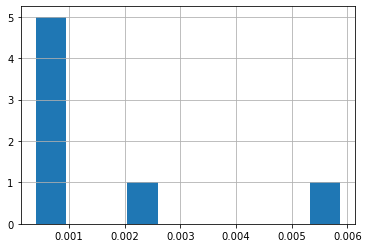

In [12]:
pourcentage_donnees_manquante=donnees_manquantes.values/base_donnees.shape[0]
colonne=base_donnees.columns
donnees_manquante=pd.Series(pourcentage_donnees_manquante,index=colonne) 
donnees_manquante.hist()

In [13]:
from sklearn.impute import KNNImputer
imputation=KNNImputer(n_neighbors=1)
imp=imputation.fit_transform(base_donnees)
imp.shape

(105119, 7)

In [14]:
traitement=pd.DataFrame(imp)
traitement.index=base_donnees.index
traitement.columns=base_donnees.columns
traitement

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,,,
2021-01-01 00:05:00,0.000000,0.000000,0.000000,21.966700,1.741600,25.90000,0.000000e+00
2021-01-01 00:10:00,0.000000,0.000000,0.000000,21.966700,1.741600,25.90000,0.000000e+00
2021-01-01 00:15:00,0.000000,0.000000,0.000000,21.966700,1.741600,25.90000,0.000000e+00
2021-01-01 00:20:00,0.000000,0.000000,0.000000,21.966700,1.741600,25.90000,0.000000e+00
2021-01-01 00:25:00,0.000000,0.000000,0.000000,21.966700,1.741600,25.90000,0.000000e+00
...,...,...,...,...,...,...,...
2021-12-31 23:35:00,260.276651,255.595406,259.809913,29.451952,2.900866,33.73188,4.486998e+06
2021-12-31 23:40:00,260.276651,255.595406,259.809913,29.451952,2.900866,33.73188,4.486998e+06
2021-12-31 23:45:00,260.276651,255.595406,259.809913,29.451952,2.900866,33.73188,4.486998e+06


In [15]:
traitement.isnull().sum()

W2- Irradiance (W/m²)                0
W3 - Irradiance (W/m²)               0
W4 - Irradiance (W/m²)               0
 Temperature ambiante (°C)           0
 Vitesse du vent (m/s)               0
Température module (°C)              0
Production Centrale Meter 1 - (W)    0
dtype: int64

IMPUTION DES DONNEES MANQUANTES

In [16]:
liste=list(traitement.columns)
list_1=liste[6:]

X=traitement.drop(list_1,axis=1)
X.shape

(105119, 6)

In [17]:
list_1=liste[:6]

y=traitement.drop(list_1,axis=1)
y.shape

(105119, 1)

In [18]:
# division de notres base base de donnees apres imputation
from sklearn.model_selection import train_test_split
#x_train,y_train,x_test,y_test=train_test_split(X,y, train_size=0.8,test_size=0.2)

In [19]:
#x_train.shape[0]
from sklearn.preprocessing import StandardScaler

In [20]:
x_train=np.array(X.iloc[:84095]).T
y_train=np.array(y.iloc[:84095]).T
x_test=np.array(X.iloc[84095:]).T
y_test=np.array(y.iloc[84095:]).T

NORMALISATION DES DONNEES

In [21]:
x_train=(x_train-x_train.mean())/x_train.std()
y_train=(y_train-y_train.mean())/y_train.std()
x_test=(x_test-x_test.mean())/x_test.std()
y_test=(y_test-y_test.mean())/y_test.std()

In [22]:
x_train

array([[-0.52263888, -0.52263888, -0.52263888, ..., -0.52263888,
        -0.52263888, -0.52263888],
       [-0.52263888, -0.52263888, -0.52263888, ..., -0.52263888,
        -0.52263888, -0.52263888],
       [-0.52263888, -0.52263888, -0.52263888, ..., -0.52263888,
        -0.52263888, -0.52263888],
       [-0.44337711, -0.44337711, -0.44337711, ..., -0.40879798,
        -0.40879798, -0.40879798],
       [-0.51635471, -0.51635471, -0.51635471, ..., -0.5169407 ,
        -0.5169407 , -0.5169407 ],
       [-0.4291847 , -0.4291847 , -0.4291847 , ..., -0.41294749,
        -0.41294749, -0.41294749]])

In [23]:
parametres=initisations([6,32,32,32,1])
activations=forword_propagation(x_train,parametres)
for key,val in activations.items():
    print(key,val.shape)

A0 (6, 84095)
A1 (32, 84095)
A2 (32, 84095)
A3 (32, 84095)
A4 (1, 84095)


In [24]:
d=len(parametres)//2
dz=activations['A'+str(d)]-y_train
m=y_train.shape[1]
gradients={}
for c in  range(d,0,-1):
    gradients['dw'+str(c)]=1/m*np.dot(dz,activations['A'+str(c-1)].T)
    gradients['db'+str(c)]=1/m*np.sum(dz,axis=1)#,keepdim=True)
len(gradients)

8

In [25]:
gradients=back_propagation(y_train,activations,parametres)
for key,val in gradients.items():
    print(key,val.shape)

dw4 (1, 32)
db4 (1,)
dw3 (32, 32)
db3 (32,)
dw2 (32, 32)
db2 (32,)
dw1 (32, 6)
db1 (32,)


In [26]:
misajour=update(gradients,parametres,0.01)
for key,val in misajour.items():
    print(key,val.shape)

w1 (32, 6)
b1 (32, 32)
w2 (32, 32)
b2 (32, 32)
w3 (32, 32)
b3 (32, 32)
w4 (1, 32)
b4 (1, 1)


In [27]:
print(parametres['w'+str(c)].shape)
print(activations['A'+str(c-1)].shape)

(32, 6)
(6, 84095)


In [31]:
dimensions=list((32,32,32))
learning_rate=0.01
dimensions.insert(0,x_train.shape[0])
dimensions.append(y_train.shape[0])
parametres=initisations(dimensions)
train_loss=[]
train_acc=[]
for i in range(10):
    activations=forword_propagation(x_train,parametres)
    gradients=back_propagation(y_train,activations,parametres)     
    parametres=update(gradients,parametres,learning_rate)

ValueError: operands could not be broadcast together with shapes (32,84095) (32,32) 

In [35]:
dimensions=list((32,32,32))
learning_rate=0.01
dimensions.insert(0,x_train.shape[0])
dimensions.append(y_train.shape[0])
dimensions

[6, 32, 32, 32, 1]

2. SELECTION DU MODELE

In [37]:
reseau_neurones(x_train,y_train,couche_cachees=(32,32,32),learning_rate=0.01,n_iter=1000)

ValueError: Multioutput target data is not supported with label binarization

3. EVATUATION

4. VALIDATION

In [39]:
from sklearn.neural_network import MLPRegressor

In [44]:
clf= MLPRegressor ('Ibfgs',hidden_layer_sizes=(100,),activation='relu',alpha=0.0001)

TypeError: __init__() got multiple values for argument 'hidden_layer_sizes'